<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/clustering/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

Now we make use of the data of $40\times 40$ system. Since it contain lots of spins, we only use 2000 sample here. 

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt 
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023
# spin configurations
df3 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/clustering/Ising_clustering_conf.csv",header=None) 
# temperature
df4 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/clustering/Ising_clustering_temp.csv",header=None)
df3 = df3.to_numpy()
df4 = df4.to_numpy()
xc = df3
tc = df4
tc = tc.T
print(xc)
print(xc.shape)
print(tc.shape)

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...
remote: Enumerating objects: 518, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 518 (delta 53), reused 2 (delta 2), pack-reused 417
Receiving objects: 100% (518/518), 29.58 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (270/270), done.
[[-7.74909122e-01  1.27143544e+00]
 [ 6.55223643e-01 -8.72356330e-01]
 [ 2.01012902e+01 -2.39105217e-02]
 ...
 [-1.97735808e+01  9.96617100e-04]
 [-1.98982500e+01 -4.48367571e-02]
 [ 4.79632658e-01 -7.53841224e-01]]
(5000, 2)
(1, 5000)


Firstly, we do PCA and plot the dimensionally reduced data.

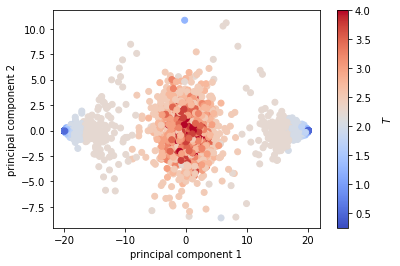

[[-7.74909122e-01  1.27143544e+00]
 [ 6.55223643e-01 -8.72356330e-01]
 [ 2.01012902e+01 -2.39105217e-02]
 ...
 [-1.97735808e+01  9.96617100e-04]
 [-1.98982500e+01 -4.48367571e-02]
 [ 4.79632658e-01 -7.53841224e-01]]


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xc)
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=tc,cmap="coolwarm") 
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.show()
print(principalComponents)
pc = principalComponents

## K-means

Obviously, these data can be split into 3 clusters. Let's do K-means method step by step.

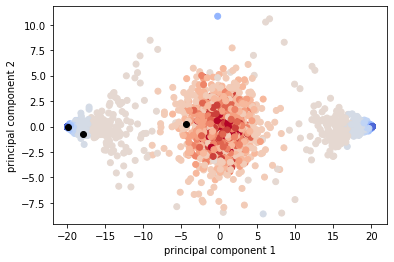

In [4]:
import random
# step 1 - choose 3 clusters at random
K=3

# step two - select random point as centroids

a = random.sample(range(0, len(principalComponents)-1), K)
Centroids = np.zeros((K,2))
#print(a)
for i in range(K):
  Centroids[i,0] = principalComponents[a[i],0]
  Centroids[i,1] = principalComponents[a[i],1]

#Centroids = principalComponents.sample(n=K)
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=tc,cmap="coolwarm")
plt.scatter(Centroids[:,0],Centroids[:,1],c='black')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [5]:
principalComponents = principalComponents.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(principalComponents)
Centroids = pd.DataFrame(Centroids)
principalComponents.columns = ['pca1','pca2']
Centroids.columns = ['pca1','pca2']
print(principalComponents)
print(Centroids)

           pca1      pca2
0     -0.774909  1.271435
1      0.655224 -0.872356
2     20.101290 -0.023911
3    -19.898250 -0.044837
4    -19.898250 -0.044837
...         ...       ...
4995 -19.898250 -0.044837
4996   1.052938 -0.329986
4997 -19.773581  0.000997
4998 -19.898250 -0.044837
4999   0.479633 -0.753841

[5000 rows x 2 columns]
        pca1      pca2
0 -17.871768 -0.705414
1 -19.873212 -0.009672
2  -4.349783  0.254510


In [6]:
# step 3 - assign all the points to the closest cluster centroid
# step 4 - recomput centroids of newly formed clusters
# step 5 - repeat 3 and 4

diff = 1
j = 0 

while (diff!=0):
    XD = principalComponents
    i = 1
    for index1,row_c in Centroids.iterrows():
        ED = []
        for index2,row_d in XD.iterrows():
            d1 = (row_c["pca1"] - row_d["pca1"])**2
            d2 = (row_c["pca2"] - row_d["pca2"])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        principalComponents[i] = ED
        i = i + 1
        
    C=[]
    for index,row in principalComponents.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i + 1
        C.append(pos)
    principalComponents["Cluster"]=C
    Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pca2","pca1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['pca2'] - Centroids['pca2']).sum() + (Centroids_new['pca1'] - Centroids['pca1']).sum()
        print(diff.sum())
    Centroids = principalComponents.groupby(["Cluster"]).mean()[["pca2","pca1"]]

3.010280931560026
3.8935400911201343
6.909990222418994
12.29996871543874
3.2646374283619175
0.08003587761368944
0.0


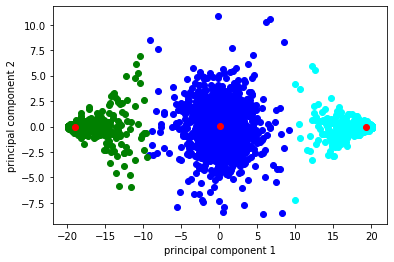

In [7]:
color=['blue','green','cyan']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    plt.scatter(data["pca1"],data["pca2"],c=color[k])
plt.scatter(Centroids["pca1"],Centroids["pca2"],c='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

## Elbow Method

We can use Elbow Method to verify that.

<br>We want a measurement for the clustering and here we define the distortion(distortion cost function):
<br>
$$
J=\frac{1}{m}\sum_{i=1}^m||x^{(i)}-\mu_{c^{i}}||^2
$$
<br>Choosing the number of clusters is of great importance. Here we introduce Elbow method, which is to vary K and compute cost function at a range of K values. And while the cost_function decrease, we choose the elbow point in the plot as K. Note, it can happen that you don't get a a nice line -> no clear elbow on curve.

In [8]:
print(pc)

[[-7.74909122e-01  1.27143544e+00]
 [ 6.55223643e-01 -8.72356330e-01]
 [ 2.01012902e+01 -2.39105217e-02]
 ...
 [-1.97735808e+01  9.96617100e-04]
 [-1.98982500e+01 -4.48367571e-02]
 [ 4.79632658e-01 -7.53841224e-01]]


In [9]:
# K-means method
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=1):
    # First we need to randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # Next, loop to approach the optimal position of the centroids
    while True:
        # Assign labels based on closest centroid
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centroid from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

In [10]:
def distortion(X,n_clusters):
    centers, labels = find_clusters(pc, n_clusters)
    cost = 0
    for i in range(0,len(X)):
        cost = cost + np.square(np.linalg.norm(X[i]-centers[labels[i]]))
    cost = cost/len(X)
    return cost

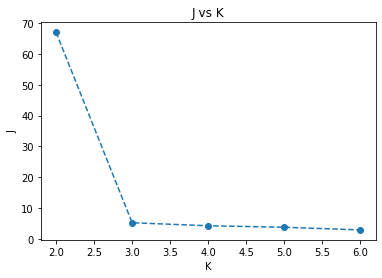

In [11]:
Kn=[]
distortions=[]
for i in range(2,7):
    Kn.append(i)
    distortions.append(distortion(pc,i))
plt.plot(Kn,distortions,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')
plt.show()

This result shows that the data should best be split into 3 clusters, which is much better than the case of 4 cluster, just as what we our figures ploted before this measure showed.

Finally, we apply the KMeans function from the sklearn package and then show the results in the figure below.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centers are: [[ 19.26262276  -0.04158764]
 [-18.98361362  -0.03903064]
 [  0.10990103   0.04944743]]


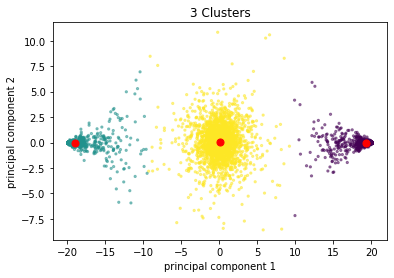

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(pc)
centroids = kmeans.cluster_centers_
print('centers are:',centroids)

fig= plt.figure()
x =pc[:,0]
y =pc[:,1]

plt.scatter(x, y, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('3 Clusters')

plt.show()